In [164]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [210]:
# https://www.kaggle.com/ludobenistant/hr-analytics
df = pd.read_csv("./data/hr.csv")

df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [211]:
# Drop text features
del df["sales"]

# Tanslate salary into a scale from 1-3 (1 = low, 3 = high)
df.replace({"salary" : {"low": 1, "medium": 2, "high" : 3 }}, inplace=True)

# Scale everything down
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Create new features
# df["_statisfaction_evaluation"] = df["satisfaction_level"] * df["last_evaluation"]
# df["_salary_satisfaction"] = df["salary"] * df["satisfaction_level"]
# df["_work_accident_2"] = df["Work_accident"] ** 2
# df["_work_accident_3"] = df["Work_accident"] ** 3

In [212]:
# Create our training and testing data
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()

# Create our Xs and Ys
Y_train = df_train["left"].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(["left"])]

Y_test = df_test["left"].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_train.columns).isin(["left"])]

In [213]:
# Take a look at our new dataframe
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1.788917,-0.147412,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1.788917,-0.147412,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1.788917,-0.147412,0.636092


In [214]:
# Vanilla regression
vanilla = linear_model.LinearRegression()
vanillafit = vanilla.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for vanilla regression:', vanilla.score(X_train, Y_train))
print('\nParameter estimates for vanilla regression:')
print(np.append(vanillafit.coef_, vanillafit.intercept_))

# See the results for the test set
print('R-squared for vanilla regression (test):', vanilla.score(X_test, Y_test))

R-squared for vanilla regression: 0.26668781319

Parameter estimates for vanilla regression:
[-0.37218156  0.01668165 -0.13057727  0.05503892  0.38232927 -0.12364511
 -0.02478779 -0.11539383  0.10327648]
R-squared for vanilla regression (test): -0.030875262081


In [215]:
# Ridge regression
ridg = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgfit = ridg.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for ridge:', ridg.score(X_train, Y_train))
print('\nParameter estimates for ridge:')
print(np.append(ridgfit.coef_, ridgfit.intercept_))

# See the results for the test set
print('R-squared for ridge (test):', ridg.score(X_test, Y_test))

R-squared for ridge: 0.257245146132

Parameter estimates for ridge:
[-0.37683941  0.02154178 -0.12660734  0.05637401  0.35276854 -0.1248408
 -0.03361669 -0.1191739   0.        ]
R-squared for ridge (test): 0.0358169485708


In [225]:
# Lasso regression
lass = linear_model.Lasso(alpha=0.5)
lassfit = lass.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for lasso:', lass.score(X_train, Y_train))
print('\nParameter estimates for lasso:')
print(np.append(lassfit.coef_, lassfit.intercept_))

# See the results for the test set
print('R-squared for lasso (test):', lass.score(X_test, Y_test))

R-squared for lasso: 0.0

Parameter estimates for lasso:
[-0.          0.          0.          0.          0.         -0.         -0.
 -0.          0.06719658]
R-squared for lasso (test): -0.0197832103443


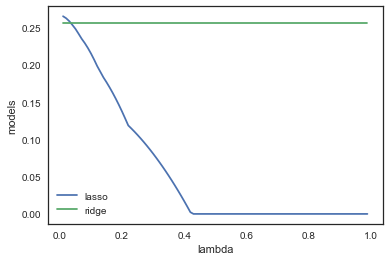

In [227]:
# Ridge plot

results = pd.DataFrame(columns=["lasso", "ridge", "lambda"])

for lambd in np.arange(0.01,1,0.01):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train, Y_train)
    lass_score = lass.score(X_train, Y_train)
    
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train, Y_train)
    ridgeregr_score = ridgeregr.score(X_train, Y_train)
    
    res = pd.DataFrame([[lass_score, ridgeregr_score, lambd]], columns=["lasso", "ridge", "lambda"])

    results = results.append(res)

plt.plot(results['lambda'], results['lasso'])
plt.plot(results['lambda'], results['ridge'])
plt.xlabel('lambda')
plt.ylabel('models')
plt.legend(["lasso", "ridge"])
plt.show()

## Questions

- What does a negative r-squared mean?
- It looks like the best model is vanilla regression, is that correct?
- All 3 models perform really poorly. What other features should we build?



In [267]:
# Should we try this with a different dataset?
# http://share.mailcharts.com/3g1g1K1y3O1Q

# https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls
col_names = ["city", "population", "violent crime", "murder", "rape 1", "rape 2", "robbery", "assault", "property crime", "burglary", "larceny", "motor theft", "arson"]
df = pd.read_csv("./data/ny_crime.csv", names=col_names, header=0, thousands=',')
df.head(3)

,city,population,violent crime,murder,rape 1,rape 2,robbery,assault,property crime,burglary,larceny,motor theft,arson
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0


In [268]:
# Drop text features
del df["rape 1"]
del df["city"]

# Delete duplicate features, based on coreplot: sns.heatmap(df.corr())
del df["larceny"]
del df["assault"]

# Drop NAs
df = df.dropna()

# Scale everything down
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [269]:
df.head(3)

,population,violent crime,murder,rape 2,robbery,property crime,burglary,motor theft,arson
0,-0.476136,-0.228950,-0.159972,-0.240923,-0.203747,-0.340561,-0.260439,-0.243230,-0.175499
1,-0.449762,-0.214011,-0.159972,-0.240923,-0.203747,-0.328095,-0.256307,-0.225749,-0.175499
2,-0.439853,-0.214011,-0.159972,-0.240923,-0.203747,-0.336406,-0.264570,-0.243230,-0.175499


In [270]:
# Create our training and testing data
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()

# Create our Xs and Ys
Y_train = df_train["murder"].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(["murder"])]

Y_test = df_test["murder"].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_train.columns).isin(["murder"])]

In [271]:
# Vanilla regression
vanilla = linear_model.LinearRegression()
vanillafit = vanilla.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for vanilla regression:', vanilla.score(X_train, Y_train))
print('\nParameter estimates for vanilla regression:')
print(np.append(vanillafit.coef_, vanillafit.intercept_))

# See the results for the test set
print('R-squared for vanilla regression (test):', vanilla.score(X_test, Y_test))

R-squared for vanilla regression: 0.90183857988

Parameter estimates for vanilla regression:
[ 0.01504113  1.03891075 -0.01248879  0.67632273  0.15080271 -0.67115786
 -0.41931764 -0.16462482 -0.02901671]
R-squared for vanilla regression (test): 0.61102057113


In [279]:
# Ridge regression
ridg = linear_model.Ridge(alpha=1, fit_intercept=False)
ridgfit = ridg.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for ridge:', ridg.score(X_train, Y_train))
print('\nParameter estimates for ridge:')
print(np.append(ridgfit.coef_, ridgfit.intercept_))

# See the results for the test set
print('R-squared for ridge (test):', ridg.score(X_test, Y_test))

R-squared for ridge: 0.863540387845

Parameter estimates for ridge:
[ 0.03250287  0.47642479 -0.00425114  0.53025837 -0.16879493 -0.07123823
  0.09042953 -0.13290019  0.        ]
R-squared for ridge (test): 0.809895081155


In [273]:
# Lasso regression
lass = linear_model.Lasso(alpha=0.01)
lassfit = lass.fit(X_train, Y_train)

# See the results for the training set
print('R-squared for lasso:', lass.score(X_train, Y_train))
print('\nParameter estimates for lasso:')
print(np.append(lassfit.coef_, lassfit.intercept_))

# See the results for the test set
print('R-squared for lasso (test):', lass.score(X_test, Y_test))

R-squared for lasso: 0.81494091849

Parameter estimates for lasso:
[-0.          0.          0.          0.85282613 -0.05122187 -0.          0.
 -0.         -0.00891233]
R-squared for lasso (test): 0.884305235611


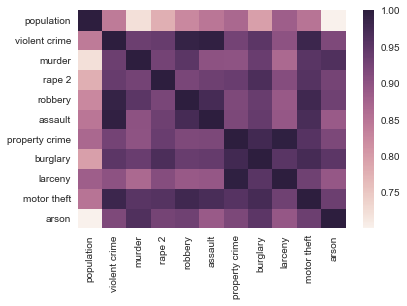

In [265]:
sns.heatmap(df.corr())

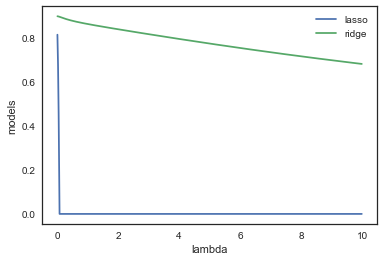

In [275]:
# Ridge plot

results = pd.DataFrame(columns=["lasso", "ridge", "lambda"])

for lambd in np.arange(0.01,10,0.01):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train, Y_train)
    lass_score = lass.score(X_train, Y_train)
    
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train, Y_train)
    ridgeregr_score = ridgeregr.score(X_train, Y_train)
    
    res = pd.DataFrame([[lass_score, ridgeregr_score, lambd]], columns=["lasso", "ridge", "lambda"])

    results = results.append(res)

plt.plot(results['lambda'], results['lasso'])
plt.plot(results['lambda'], results['ridge'])
plt.xlabel('lambda')
plt.ylabel('models')
plt.legend(["lasso", "ridge"])
plt.show()